In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max.columns", None)
df = pd.read_csv('./data/memory_200steps.csv')

In [3]:
df.head(10)

,NumberOfIntegers,DataStructure,insert(),insertAt(),contains(),indexOf(),get(),delete()
0,100000,ArrayList,3,3,3,3,3,3
1,100000,ArrayList_Initialized,42,42,42,42,42,42
2,100000,LinkedList,5,5,5,5,5,5
3,100000,Vector,4,4,4,4,4,4
4,100000,VectorInitialized,42,42,42,42,42,42
5,150000,ArrayList,5,5,5,5,5,5
6,150000,ArrayList_Initialized,43,43,43,43,43,43
7,150000,LinkedList,8,8,8,8,8,8
8,150000,Vector,5,5,5,5,5,5
9,150000,VectorInitialized,43,43,43,43,43,43


### Grouping the values by NumberOfIntegers

In [4]:
g = df.groupby('NumberOfIntegers')
# g.apply(lambda x: x).head(10)
g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)).head(10)

NumberOfIntegers          DataStructure  insert()  \
NumberOfIntegers                                                        
100000           0            100000                 Vector         4   
                 1            100000      VectorInitialized        42   
                 2            100000             LinkedList         5   
                 3            100000  ArrayList_Initialized        42   
                 4            100000              ArrayList         3   
150000           0            150000      VectorInitialized        43   
                 1            150000             LinkedList         8   
                 2            150000              ArrayList         5   
                 3            150000  ArrayList_Initialized        43   
                 4            150000                 Vector         5   

                    insertAt()  contains()  indexOf()  get()  delete()  
NumberOfIntegers                                                        
100000           0           4           4          4      4         4  
                 1          42          42         42     42        42  
                 2           5           5          5      5         5  
                 3          42          42         42     42        42  
                 4           3           3          3      3         3  
150000           0          43          43         43     43        43  
                 1           8           8          8      8         8  
                 2           5           5          5      5         5  
                 3          43          43         43     43        43  
                 4           5           5          5      5         5

### Taking the minmum value of the insert() column of each group

In [5]:
df.groupby('NumberOfIntegers')['insert()'].min()

NumberOfIntegers
100000       3
150000       5
200000       6
250000       9
300000      10
            ..
9850000     28
9900000     28
9950000     28
10000000    28
10050000    28
Name: insert(), Length: 200, dtype: int64

### Viewing the entire rows of above values

We need to take the minimum value of each column separately for each group, and consider it as the best data structure for that number of insert values. For example, below, we have considered the insert() column, and taken the minimum run-time for each group. The data structure that values belongs is the best data structure for that particular group in terms of insert() operation.

In [7]:
df.loc[df.groupby('NumberOfIntegers')['insert()'].idxmin()][['DataStructure', 'insert()']]

,DataStructure,insert()
0,ArrayList,3
5,ArrayList,5
10,ArrayList,6
15,ArrayList,9
20,ArrayList,10
...,...,...
975,ArrayList,28
980,ArrayList,28
985,ArrayList,28
990,ArrayList,28


### Method that returns individual grouped dfs with min value of the relevant column

In [8]:
def get_min_dfs():
    cols = ['insert()', 'insertAt()', 'contains()', 'indexOf()', 'get()', 'delete()']
    return [df.loc[df.groupby('NumberOfIntegers')[col].idxmin()][['NumberOfIntegers', 'DataStructure', col]] for col in cols]

In [9]:
min_dfs = get_min_dfs()
min_dfs[0:2]

[     NumberOfIntegers DataStructure  insert()
 0              100000     ArrayList         3
 5              150000     ArrayList         5
 10             200000     ArrayList         6
 15             250000     ArrayList         9
 20             300000     ArrayList        10
 ..                ...           ...       ...
 975           9850000     ArrayList        28
 980           9900000     ArrayList        28
 985           9950000     ArrayList        28
 990          10000000     ArrayList        28
 995          10050000     ArrayList        28
 
 [200 rows x 3 columns],
      NumberOfIntegers DataStructure  insertAt()
 0              100000     ArrayList           3
 5              150000     ArrayList           5
 10             200000     ArrayList           6
 15             250000     ArrayList           9
 20             300000     ArrayList          10
 ..                ...           ...         ...
 975           9850000     ArrayList          28
 980           99

In [46]:
min_dfs[0:1][0]

,NumberOfIntegers,DataStructure,insert()
0,100000,ArrayList,3
5,150000,ArrayList,5
10,200000,ArrayList,6
15,250000,ArrayList,9
20,300000,ArrayList,10
...,...,...,...
975,9850000,ArrayList,28
980,9900000,ArrayList,28
985,9950000,ArrayList,28
990,10000000,ArrayList,28


### Adding a new 'recommended' column

Adding a new recommended column to the original dataset with the recommended data structure. Next, consider mapping all the groups(NumberOfIntegers) to their best data structure(here, we have taken the inser() column).

In [10]:
# converting the columns to arrays
num_of_int_arr = min_dfs[0]['NumberOfIntegers'].to_numpy()
col_arr = min_dfs[0]['DataStructure'].to_numpy()

Now, add a new column to save the recommended or the best data structures from each group, and add that value to other rows of each group as well.

Below, we can see that the data structure that has minimum 'insert()' run-time has been added to the every row of each group in a new column.

### Do this to all the groups

#### Get dfs split into each function(insert(), insertAt(), etc.)

In [11]:
cols = ['insert()', 'insertAt()', 'contains()', 'indexOf()', 'get()', 'delete()']
def get_dfs():
    return [df[['NumberOfIntegers', 'DataStructure', col]] for col in cols]

In [12]:
split_dfs = get_dfs()
# split_dfs[0:2]

In [13]:
min_datastructures = [min_df['DataStructure'].to_numpy() for min_df in min_dfs] # list of data structures with the minimum value
mappings = [dict(zip(num_of_int_arr, min_df)) for min_df in min_datastructures] # list of mappings
new_cols = ['ds_insert()', 'ds_insertAt()', 'ds_contains()', 'ds_indexOf()', 'ds_get()', 'ds_delete()']

for index, split_df in enumerate(split_dfs):
    split_df[new_cols[index]] = split_df['NumberOfIntegers'].map(mappings[index])

/tmp/ipykernel_216/2339002868.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split_df[new_cols[index]] = split_df['NumberOfIntegers'].map(mappings[index])


In [47]:
sample = split_dfs[0:1][0]
sample.columns = sample.columns.str.replace('NumberOfIntegers', 'NumberOfElements')
[df for df in sample.groupby('ds_insert()')]

[('ArrayList',
       NumberOfElements  DataStructure  insert() ds_insert()
  0              100000              0         3   ArrayList
  1              100000              1        42   ArrayList
  2              100000              2         5   ArrayList
  3              100000              3         4   ArrayList
  4              100000              4        42   ArrayList
  ..                ...            ...       ...         ...
  995          10050000              0        28   ArrayList
  996          10050000              1        62   ArrayList
  997          10050000              2        47   ArrayList
  998          10050000              3        29   ArrayList
  999          10050000              4        62   ArrayList
  
  [985 rows x 4 columns]),
 ('Vector',
      NumberOfElements  DataStructure  insert() ds_insert()
  45            550000              0        17      Vector
  46            550000              1        52      Vector
  47            550000         

In [16]:
import docx

table_df = split_dfs[0:1][0].head(20)

doc = docx.Document()

t = doc.add_table(table_df.shape[0]+1, table_df.shape[1])

for j in range(table_df.shape[-1]):
    t.cell(0,j).text = table_df.columns[j]
    
for i in range(table_df.shape[0]):
    for j in range(table_df.shape[-1]):
        t.cell(i+1,j).text = str(table_df.values[i,j])
        
doc.save('./data/pd_df_list__insert_memory_table.docx')

## Classification

### Method to get the trained model info

In [17]:
import sklearn.metrics as metrics

def print_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy score:\n', metrics.accuracy_score(y_test, y_pred))
    print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
    print('Classification report:\n', metrics.classification_report(y_test, y_pred, digits=4))
    print('Precision:\n',metrics.precision_score(y_test, y_pred, average=None))
    print('Recall:\n',metrics.recall_score(y_test, y_pred, average=None))

### Encode the 'DataStructure' column

In [20]:
# encoding data structures so it can be used as an input parameter
ds_encode_dic = {"ArrayList": 0, "ArrayList_Initialized": 1, "LinkedList": 2, "Vector": 3, "VectorInitialized": 4}

split_dfs = [df.replace({"DataStructure": ds_encode_dic}) for df in split_dfs]
# split_dfs = [df.replace({new_cols[i]: ds_encode_dic}) for i, df in enumerate(split_dfs)]

In [21]:
split_dfs[0:1][0].head(10)

,NumberOfIntegers,DataStructure,insert(),ds_insert()
0,100000,0,3,ArrayList
1,100000,1,42,ArrayList
2,100000,2,5,ArrayList
3,100000,3,4,ArrayList
4,100000,4,42,ArrayList
5,150000,0,5,ArrayList
6,150000,1,43,ArrayList
7,150000,2,8,ArrayList
8,150000,3,5,ArrayList
9,150000,4,43,ArrayList


In [22]:
print(split_dfs[0:1][0].shape)

num_of_classes = len(split_dfs[0:1][0]['ds_insert()'].unique())
print(num_of_classes)

(1000, 4)
2


### split train input and output data

In [32]:
# split train input and output data
Xs = []
Ys = []

for i, df in enumerate(split_dfs):
    Xs.append(df.drop(axis=0, columns=[new_cols[i]]))
    Ys.append(df[new_cols[i]])

## Xgboost classifier

In [36]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

model_dic = {}

for X, Y, col_name in zip(Xs, Ys, new_cols):
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    
    # Create a classifier
    xgb = XGBClassifier(
                              booster='gbtree', 
                              objective='multi:softprob', 
                              random_state=42, 
                              eval_metric="auc", 
                              num_class=num_of_classes,
                              # n_estimators=2000
                              # use_label_encoder=False
                          )

    # define the datasets to evaluate each iteration
    evalset = [(X_train, y_train), (X_test, y_test)]

    # Fit the classifier with the training data
    xgb.fit(X_train, y_train, eval_metric=['merror','mlogloss'], eval_set=evalset, verbose=False)
    
    model_dic[col_name] = xgb

    print('\n--------------------------' + col_name + '--------------------------')
    print_model_performance(xgb, X_test, y_test)
    print('----------------------------------------------------------------')

/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



--------------------------ds_insert()--------------------------
Accuracy score:
 1.0
Confusion matrix:
 [[326   0]
 [  0   4]]
Classification report:
               precision    recall  f1-score   support

   ArrayList     1.0000    1.0000    1.0000       326
      Vector     1.0000    1.0000    1.0000         4

    accuracy                         1.0000       330
   macro avg     1.0000    1.0000    1.0000       330
weighted avg     1.0000    1.0000    1.0000       330

Precision:
 [1. 1.]
Recall:
 [1. 1.]
----------------------------------------------------------------

--------------------------ds_insertAt()--------------------------
Accuracy score:
 1.0
Confusion matrix:
 [[328   0]
 [  0   2]]
Classification report:
               precision    recall  f1-score   support

   ArrayList     1.0000    1.0000    1.0000       328
      Vector     1.0000    1.0000    1.0000         2

    accuracy                         1.0000       330
   macro avg     1.0000    1.0000    1.0000    

/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



--------------------------ds_contains()--------------------------
Accuracy score:
 1.0
Confusion matrix:
 [[328   0]
 [  0   2]]
Classification report:
               precision    recall  f1-score   support

   ArrayList     1.0000    1.0000    1.0000       328
      Vector     1.0000    1.0000    1.0000         2

    accuracy                         1.0000       330
   macro avg     1.0000    1.0000    1.0000       330
weighted avg     1.0000    1.0000    1.0000       330

Precision:
 [1. 1.]
Recall:
 [1. 1.]
----------------------------------------------------------------

--------------------------ds_indexOf()--------------------------
Accuracy score:
 1.0
Confusion matrix:
 [[328   0]
 [  0   2]]
Classification report:
               precision    recall  f1-score   support

   ArrayList     1.0000    1.0000    1.0000       328
      Vector     1.0000    1.0000    1.0000         2

    accuracy                         1.0000       330
   macro avg     1.0000    1.0000    1.0000   

/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



--------------------------ds_get()--------------------------
Accuracy score:
 1.0
Confusion matrix:
 [[328   0]
 [  0   2]]
Classification report:
               precision    recall  f1-score   support

   ArrayList     1.0000    1.0000    1.0000       328
      Vector     1.0000    1.0000    1.0000         2

    accuracy                         1.0000       330
   macro avg     1.0000    1.0000    1.0000       330
weighted avg     1.0000    1.0000    1.0000       330

Precision:
 [1. 1.]
Recall:
 [1. 1.]
----------------------------------------------------------------

--------------------------ds_delete()--------------------------
Accuracy score:
 1.0
Confusion matrix:
 [[328   0]
 [  0   2]]
Classification report:
               precision    recall  f1-score   support

   ArrayList     1.0000    1.0000    1.0000       328
      Vector     1.0000    1.0000    1.0000         2

    accuracy                         1.0000       330
   macro avg     1.0000    1.0000    1.0000       33

## Learning curves


--------------------------ds_insert()--------------------------


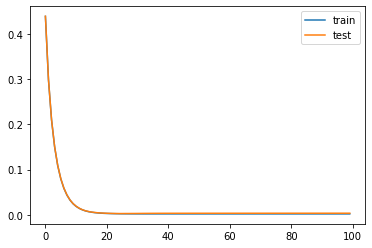


--------------------------ds_insertAt()--------------------------


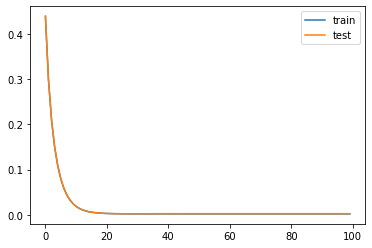


--------------------------ds_contains()--------------------------


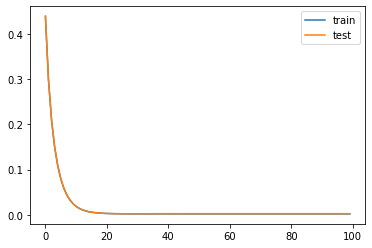


--------------------------ds_indexOf()--------------------------


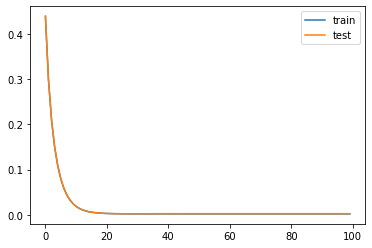


--------------------------ds_get()--------------------------


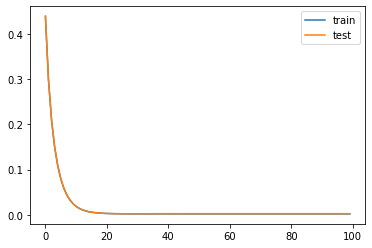


--------------------------ds_delete()--------------------------


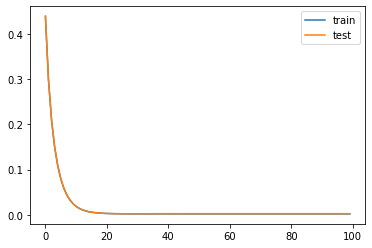

In [26]:
for key, model in model_dic.items():
    print('\n--------------------------' + key + '--------------------------')
    
    # retrieve performance metrics
    results = model.evals_result()

    # plot learning curves
    plt.plot(results['validation_0']['mlogloss'], label='train')
    plt.plot(results['validation_1']['mlogloss'], label='test')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [46]:
# for key, model in model_dic.items():
#     print('\n--------------------------' + key + '--------------------------')
    
#     # retrieve performance metrics
#     results = model.evals_result()

#     # plot learning curves
#     plt.plot(results['validation_0']['merror'], label='train')
#     plt.plot(results['validation_1']['merror'], label='test')
#     # show the legend
#     plt.legend()
#     # show the plot
#     plt.show()

In [47]:
# from sklearn.metrics import roc_auc_score
# from sklearn import preprocessing

# # Use trained model to predict output of test dataset
# val = xgb.predict(X_test)

# lb = preprocessing.LabelBinarizer()
# lb.fit(y_test)

# y_test_lb = lb.transform(y_test)
# val_lb = lb.transform(val)

# roc_auc_score(y_test_lb, val_lb, average='macro')

In [67]:
row = pd.DataFrame(columns=['NumberOfIntegers', 'DataStructure', 'insert()'])
row = row.append({
    'NumberOfIntegers': 100000, 
    'DataStructure': None, 
    'insert()': None
}, ignore_index = True)
print(row)
single_predict = model_dic['ds_insert()'].predict(row)
single_predict

   NumberOfIntegers  DataStructure  insert()
0          100000.0            NaN       NaN


array(['Vector_Initialized'], dtype=object)

## Cross validation

In [ ]:
X_test = Xs[0][1]
y_test = Xs[0][3]

val = model_dic['ds_insert()'].predict(X_test)

output = pd.DataFrame()
output['Expected Output'] = y_test
output['Predicted Output'] = val
output.head(20)